Assessment 

In [181]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt 
plt.rc('font', size=14)
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
import seaborn as sns
sns.set(style='white')
sns.set(style='whitegrid', color_codes=True)

In [182]:
df = pd.read_excel(r'Credit_Data.xls')
print(df)

     OBS#  CHK_ACCT  DURATION  HISTORY  NEW_CAR  USED_CAR  FURNITURE  \
0       1         0         6        4        0         0          0   
1       2         1        48        2        0         0          0   
2       3         3        12        4        0         0          0   
3       4         0        42        2        0         0          1   
4       5         0        24        3        1         0          0   
..    ...       ...       ...      ...      ...       ...        ...   
995   996         3        12        2        0         0          1   
996   997         0        30        2        0         1          0   
997   998         3        12        2        0         0          0   
998   999         0        45        2        0         0          0   
999  1000         1        45        4        0         1          0   

     RADIO/TV  EDUCATION  RETRAINING  ...  AGE  OTHER_INSTALL  RENT  OWN_RES  \
0           1          0           0  ...   67         

In [183]:
df.head()
print(df.shape)
print(list(df.columns))

(1000, 32)
['OBS#', 'CHK_ACCT', 'DURATION', 'HISTORY', 'NEW_CAR', 'USED_CAR', 'FURNITURE', 'RADIO/TV', 'EDUCATION', 'RETRAINING', 'AMOUNT', 'SAV_ACCT', 'EMPLOYMENT', 'INSTALL_RATE', 'MALE_DIV', 'MALE_SINGLE', 'MALE_MAR_or_WID', 'CO-APPLICANT', 'GUARANTOR', 'PRESENT_RESIDENT', 'REAL_ESTATE', 'PROP_UNKN_NONE', 'AGE', 'OTHER_INSTALL', 'RENT', 'OWN_RES', 'NUM_CREDITS', 'JOB', 'NUM_DEPENDENTS', 'TELEPHONE', 'FOREIGN', 'DEFAULT']


Check the null value in the dataset 

In [184]:
df.isnull().sum()
df.dtypes

OBS#                int64
CHK_ACCT            int64
DURATION            int64
HISTORY             int64
NEW_CAR             int64
USED_CAR            int64
FURNITURE           int64
RADIO/TV            int64
EDUCATION           int64
RETRAINING          int64
AMOUNT              int64
SAV_ACCT            int64
EMPLOYMENT          int64
INSTALL_RATE        int64
MALE_DIV            int64
MALE_SINGLE         int64
MALE_MAR_or_WID     int64
CO-APPLICANT        int64
GUARANTOR           int64
PRESENT_RESIDENT    int64
REAL_ESTATE         int64
PROP_UNKN_NONE      int64
AGE                 int64
OTHER_INSTALL       int64
RENT                int64
OWN_RES             int64
NUM_CREDITS         int64
JOB                 int64
NUM_DEPENDENTS      int64
TELEPHONE           int64
FOREIGN             int64
DEFAULT             int64
dtype: object

This shows that the dataset has no null value. 

Now,
DEFAULT (independent variable) - has the loan applicant defaulted on his loan? (binary: “1”, means “Yes”, “0” means “No”)

In [185]:
df['DEFAULT'].value_counts()

0    700
1    300
Name: DEFAULT, dtype: int64

Data Visualization

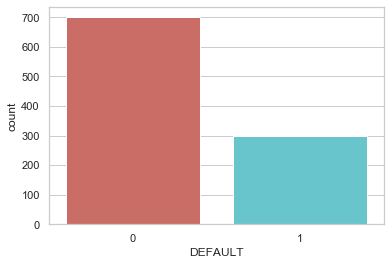

In [186]:
sns.countplot(x='DEFAULT', data=df, palette='hls')
plt.show()

In [187]:
count_no_default = len(df[df['DEFAULT']==0])
count_default = len(df[df['DEFAULT']==1])
pct_of_no_default = count_no_default/(count_no_default+count_default)
print('\033[1m percentage of no default is', pct_of_no_default*100)
pct_of_default = count_default/(count_no_default+count_default)
print('\033[1m percentage of default', pct_of_default*100)

 percentage of no default is 70.0
 percentage of default 30.0


Our classes are imbalanced, and the ratio of no-default to default instances is 7:3. Before we go ahead to balance the classes, let’s do some more exploration.

In [188]:
df.groupby('DEFAULT').mean()

,OBS#,CHK_ACCT,DURATION,HISTORY,NEW_CAR,USED_CAR,FURNITURE,RADIO/TV,EDUCATION,RETRAINING,...,PROP_UNKN_NONE,AGE,OTHER_INSTALL,RENT,OWN_RES,NUM_CREDITS,JOB,NUM_DEPENDENTS,TELEPHONE,FOREIGN
DEFAULT,,,,,,,,,,,,,,,,,,,,,
0,493.96,1.865714,19.207143,2.707143,0.207143,0.122857,0.175714,0.311429,0.040000,0.090000,...,0.124286,36.224286,0.157143,0.155714,0.752857,1.424286,1.890000,1.155714,0.415714,0.047143
1,515.76,0.903333,24.860000,2.166667,0.296667,0.056667,0.193333,0.206667,0.073333,0.113333,...,0.223333,33.963333,0.253333,0.233333,0.620000,1.366667,1.936667,1.153333,0.376667,0.013333


Observations:

1. The average age of loan applicants who defaulted on their credit card is higher than that of the loan applicants who didn’t.
2. The average checking account balance is lower for the defaulters as compared to non defaulters. 
3. Surprisingly, education level is more for defaulters than for the non-defaulters. 
4. Understandable, number of new cars, furnitures, and other installments are more among the credit card defaulters. 

In [189]:
df.groupby('EDUCATION').mean()

,OBS#,CHK_ACCT,DURATION,HISTORY,NEW_CAR,USED_CAR,FURNITURE,RADIO/TV,RETRAINING,AMOUNT,...,AGE,OTHER_INSTALL,RENT,OWN_RES,NUM_CREDITS,JOB,NUM_DEPENDENTS,TELEPHONE,FOREIGN,DEFAULT
EDUCATION,,,,,,,,,,,,,,,,,,,,,
0,502.16,1.574737,20.892632,2.531579,0.246316,0.108421,0.190526,0.294737,0.102105,3276.04,...,35.367368,0.185263,0.178947,0.723158,1.408421,1.904211,1.151579,0.402105,0.038947,0.292632
1,468.96,1.620000,21.100000,2.800000,0.000000,0.000000,0.000000,0.000000,0.000000,3180.40,...,38.940000,0.200000,0.180000,0.520000,1.380000,1.900000,1.220000,0.440000,0.000000,0.440000


Visualization

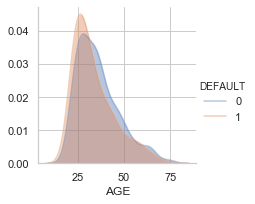

In [84]:
g = sns.FacetGrid(df,hue='DEFAULT')
g = g.map(sns.kdeplot,'AGE',shade=True,alpha=0.4)                      
g.add_legend()

In [86]:
df['AGE'].loc[df['DEFAULT'] == 1].describe()

count    300.000000
mean      33.963333
std       11.222379
min       19.000000
25%       25.000000
50%       31.000000
75%       40.000000
max       74.000000
Name: AGE, dtype: float64

In [87]:
df['EDUCATION'].loc[df['DEFAULT'] == 0].describe()

count    700.000000
mean       0.040000
std        0.196099
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        1.000000
Name: EDUCATION, dtype: float64

In [88]:
df['EDUCATION'].loc[df['DEFAULT'] == 1].describe()

count    300.000000
mean       0.073333
std        0.261118
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        1.000000
Name: EDUCATION, dtype: float64

In [89]:
df.EDUCATION

0      0
1      0
2      1
3      0
4      0
      ..
995    0
996    0
997    0
998    0
999    0
Name: EDUCATION, Length: 1000, dtype: int64

In [90]:
df.EMPLOYMENT

0      4
1      2
2      3
3      3
4      2
      ..
995    3
996    2
997    4
998    2
999    0
Name: EMPLOYMENT, Length: 1000, dtype: int64

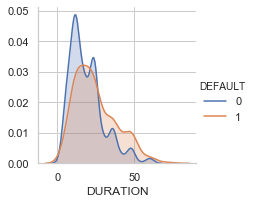

In [91]:
g = sns.FacetGrid(df,hue='DEFAULT')
g = g.map(sns.kdeplot,'DURATION',shade=True)                      
g.add_legend()

In [92]:
df.dtypes

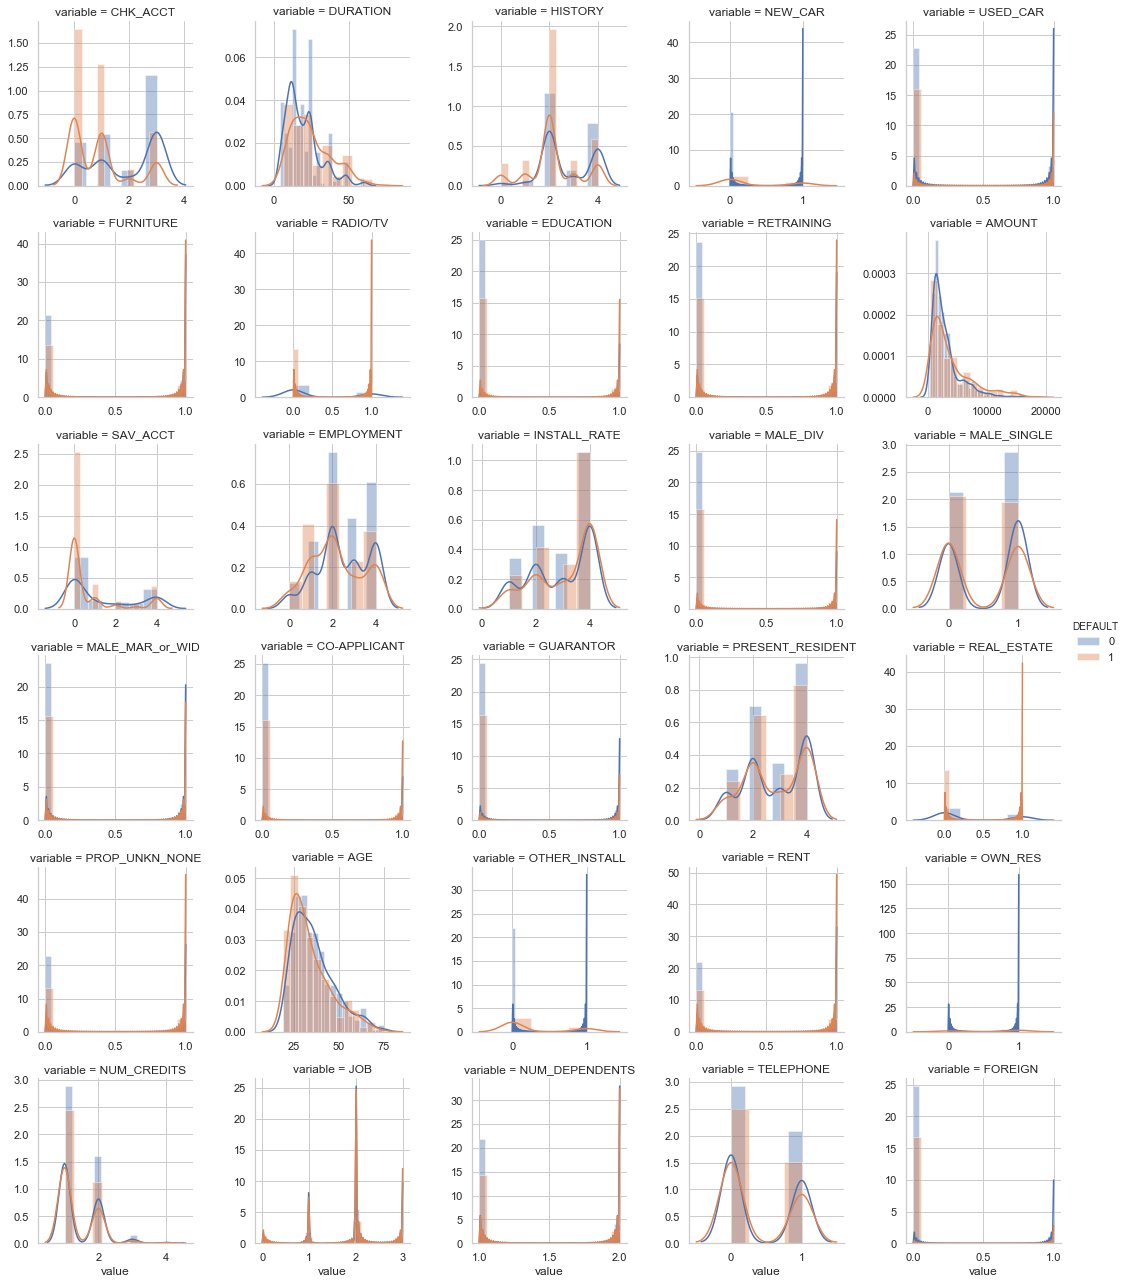

In [94]:
cols = [ f for f in df.columns if df.dtypes[ f ] != "object"]
cols.remove( 'DEFAULT' )
f = pd.melt( df, id_vars='DEFAULT', value_vars=cols)
g = sns.FacetGrid( f, hue='DEFAULT', col='variable', col_wrap=5, sharex=False, sharey=False )
g = g.map( sns.distplot, 'value', kde=True).add_legend()

# Over-sampling using SMOTE
With our training data created, I’ll up-sample the default using the SMOTE algorithm (Synthetic Minority Oversampling Technique). At a high level, SMOTE:

Works by creating synthetic samples from the minor class (default) instead of creating copies.
Randomly choosing one of the k-nearest-neighbors and using it to create a similar, but randomly tweaked, new observations.
We are going to implement SMOTE in Python.

In [102]:
conda install -c conda-forge imbalanced-learn

Solving environment: failed with initial frozen solve. Retrying with flexible solve.
Solving environment: failed with repodata from current_repodata.json, will retry with next repodata source.
Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 4.7.12
  latest version: 22.9.0

Please update conda by running

    $ conda update -n base -c defaults conda



## Package Plan ##

  environment location: /Users/jayatichakraborty/opt/anaconda3

  added / updated specs:
    - imbalanced-learn


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    certifi-2019.9.11          |           py37_0         147 KB  conda-forge
    conda-4.12.0               |   py37hf985489_0        1017 KB  conda-forge
    imbalanced-learn-0.5.0     |             py_0          98 KB  conda-forge
    python_abi-3.7             |          2_cp37m           4 KB  conda-forge
    ---

In [190]:
import imblearn 

In [191]:
X = df.loc[:, df.columns != 'DEFAULT']
y = df.loc[:, df.columns == 'DEFAULT']
from imblearn import under_sampling 
from imblearn import over_sampling
from imblearn.over_sampling import SMOTE
os = SMOTE(random_state = 4)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 4)
columns = X_train.columns
os_data_X , os_data_y = os.fit_sample (X_train, y_train.values.ravel())
os_data_X = pd.DataFrame (data = os_data_X , columns = columns )
os_data_y = pd.DataFrame (data = os_data_y , columns = ['DEFAULT'])

In [192]:
print('\033[1m length of oversampled data is ',len(os_data_X))
print('\033[1m Number of no default in oversampled data', len(os_data_y[os_data_y['DEFAULT']==0]))
print('\033[1m Number of default',len(os_data_y[os_data_y['DEFAULT']==1]))
print('\033[1m Proportion of no default data in oversampled data is',len(os_data_y[os_data_y['DEFAULT']==0])/len(os_data_X))
print('\033[1m Proportion of default data in oversampled data is',len(os_data_y[os_data_y['DEFAULT']==1])/len(os_data_X))


 length of oversampled data is  1118
 Number of no default in oversampled data 559
 Number of default 559
 Proportion of no default data in oversampled data is 0.5
 Proportion of default data in oversampled data is 0.5


Now we have a perfect balanced data!You may have noticed that I over-sampled only on the training data, because by oversampling only on the training data, none of the information in the test data is being used to create synthetic observations, therefore, no information will bleed from test data into the model training.

# Recursive Feature Elimination
Recursive Feature Elimination (RFE) is based on the idea to repeatedly construct a model and choose either the best or worst performing feature, setting the feature aside and then repeating the process with the rest of the features. This process is applied until all features in the dataset are exhausted. The goal of RFE is to select features by recursively considering smaller and smaller sets of features.



In [193]:
import warnings
warnings.filterwarnings("ignore")
data_final_vars=df.columns.values.tolist()
y=['DEFAULT']
X=[i for i in data_final_vars if i not in y]
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
rfe = RFE(logreg, 9)
rfe = rfe.fit(os_data_X, os_data_y.values.ravel())
print(rfe.support_)
print(rfe.ranking_)

[False False False False  True  True  True  True  True  True False False
 False False False False False False  True False  True False False False
 False False False False False False  True]
[22  2 20  7  1  1  1  1  1  1 23  9 19 16 12  3  6 10  1 17  1 14 21  8
  5  4 15 13 18 11  1]


In [194]:
os_data_X.columns

Index(['OBS#', 'CHK_ACCT', 'DURATION', 'HISTORY', 'NEW_CAR', 'USED_CAR',
       'FURNITURE', 'RADIO/TV', 'EDUCATION', 'RETRAINING', 'AMOUNT',
       'SAV_ACCT', 'EMPLOYMENT', 'INSTALL_RATE', 'MALE_DIV', 'MALE_SINGLE',
       'MALE_MAR_or_WID', 'CO-APPLICANT', 'GUARANTOR', 'PRESENT_RESIDENT',
       'REAL_ESTATE', 'PROP_UNKN_NONE', 'AGE', 'OTHER_INSTALL', 'RENT',
       'OWN_RES', 'NUM_CREDITS', 'JOB', 'NUM_DEPENDENTS', 'TELEPHONE',
       'FOREIGN'],
      dtype='object')

In [195]:
data_X1 = pd.DataFrame({
 'Feature': os_data_X.columns,
 'Importance': rfe.ranking_},)
data_X1.sort_values(by=['Importance'])

,Feature,Importance
30,FOREIGN,1
20,REAL_ESTATE,1
18,GUARANTOR,1
4,NEW_CAR,1
5,USED_CAR,1
6,FURNITURE,1
7,RADIO/TV,1
8,EDUCATION,1
9,RETRAINING,1
1,CHK_ACCT,2


In [196]:
cols=[]
for i in range (0, len(data_X1['Importance'])):
 if data_X1['Importance'][i] == 1:cols.append(data_X1['Feature'][i]) 
print(cols)
print(len(cols))

['NEW_CAR', 'USED_CAR', 'FURNITURE', 'RADIO/TV', 'EDUCATION', 'RETRAINING', 'GUARANTOR', 'REAL_ESTATE', 'FOREIGN']
9


In [197]:
X=os_data_X[cols]
y=os_data_y['DEFAULT']

# Implementing the Model

In [198]:
import statsmodels.api as sm
logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.631035
         Iterations 6
                         Results: Logit
Model:              Logit            Pseudo R-squared: 0.090     
Dependent Variable: DEFAULT          AIC:              1428.9934 
Date:               2022-11-07 21:28 BIC:              1474.1671 
No. Observations:   1118             Log-Likelihood:   -705.50   
Df Model:           8                LL-Null:          -774.94   
Df Residuals:       1109             LLR p-value:      4.0495e-26
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     6.0000                                       
------------------------------------------------------------------
               Coef.   Std.Err.     z     P>|z|    [0.025   0.975]
------------------------------------------------------------------
NEW_CAR        0.2799    0.1461   1.9152  0.0555  -0.0065   0.5662
USED_CAR      -1.2448    0.2743  -4.5372  0.0000  -1.7825  -0.

The p-values for most of the variables are smaller than 0.05. However, the p-values of Education, Retraining, anf Guarantor are are more than 0.05. I am not using them for now. 

In [199]:
pvalue = pd.DataFrame(result.pvalues,columns={'p_value'},)
pvalue

,p_value
NEW_CAR,5.546472e-02
USED_CAR,5.700284e-06
FURNITURE,5.641133e-02
RADIO/TV,9.148638e-07
EDUCATION,3.901541e-01
RETRAINING,4.327153e-02
GUARANTOR,2.097859e-01
REAL_ESTATE,2.219911e-04
FOREIGN,5.263787e-03


In [200]:
pvs=[]
for i in range (0, len(pvalue['p_value'])):
 if pvalue['p_value'][i] < 0.05:pvs.append(pvalue.index[i])
 if 'const' in pvs:pvs.remove('const')
else:pvs 
print(pvs)
print(len(pvs))

['USED_CAR', 'RADIO/TV', 'RETRAINING', 'REAL_ESTATE', 'FOREIGN']
5


In [201]:
X=os_data_X[pvs]
y=os_data_y["DEFAULT"]
logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.635787
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                DEFAULT   No. Observations:                 1118
Model:                          Logit   Df Residuals:                     1113
Method:                           MLE   Df Model:                            4
Date:                Mon, 07 Nov 2022   Pseudo R-squ.:                 0.08275
Time:                        21:28:19   Log-Likelihood:                -710.81
converged:                       True   LL-Null:                       -774.94
Covariance Type:            nonrobust   LLR p-value:                 9.187e-27
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
USED_CAR       -1.2502      0.274     -4.561      0.000      -1.787      -0.713
RADIO/TV       -0.7953    

# Logistic Regression Model Fitting

In [202]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

# Predicting the test set results and calculating the accuracy

In [203]:
from sklearn.metrics import accuracy_score
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(accuracy_score(y_test, y_pred)))

Accuracy of logistic regression classifier on test set: 0.73


In [204]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[83 28]
 [33 80]]


In [205]:
print('\033[1m The result is telling us that we have:' ,(confusion_matrix[0,0]+confusion_matrix[1,1]),'correct predictions\033[1m')
print('\033[1m The result is telling us that we have:' ,(confusion_matrix[0,1]+confusion_matrix[1,0]),'incorrect predictions\033[1m')
print('\033[1m We have a total predictions of:',(confusion_matrix.sum()))

 The result is telling us that we have: 163 correct predictions
 The result is telling us that we have: 61 incorrect predictions
 We have a total predictions of: 224


# Compute precision, recall, F-measure and support

To quote from Scikit Learn:

The precision is the ratio tp / (tp + fp) where tp is the number of true positives and fp the number of false positives. The precision is intuitively the ability of the classifier to not label a sample as positive if it is negative.

The recall is the ratio tp / (tp + fn) where tp is the number of true positives and fn the number of false negatives. The recall is intuitively the ability of the classifier to find all the positive samples.

The F-beta score can be interpreted as a weighted harmonic mean of the precision and recall, where an F-beta score reaches its best value at 1 and worst score at 0.

The F-beta score weights the recall more than the precision by a factor of beta. beta = 1.0 means recall and precision are equally important.

The support is the number of occurrences of each class in y_test.

In [207]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.72      0.75      0.73       111
           1       0.74      0.71      0.72       113

    accuracy                           0.73       224
   macro avg       0.73      0.73      0.73       224
weighted avg       0.73      0.73      0.73       224



Interpretations:

The precision of class 1 in the test set, that is the positive predicted value of our model, tells us that, 74% of the "default" which our model managed to identify were actually “default” credit card.
The recall of class 1 in the test set, that is the sensitivity of our model, tells us how many “default” our model has managed to identify out of all the “default” of credit card holders. So, my model managed to identify 71% of "default" credit card users out of all the “defaulter”.

ROC Curve
The receiver operating characteristic (ROC) curve is another common tool used with binary classifiers. The dotted line represents the ROC curve of a purely random classifier; a good classifier stays as far away from that line as possible (toward the top-left corner).

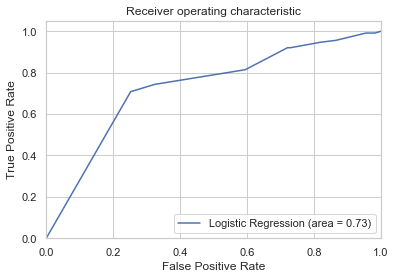

In [209]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc='lower right')
plt.savefig('Log_ROC')
plt.show()

# Deployment 

Finally, the best way to use the model we have built is to assign a probability to default to each of the credit card holders. In order to obtain the probability of probability to default from my model, I will use the following code:

In [210]:
df['PD'] = logreg.predict_proba(df[X_train.columns])[:,1]
df[['OBS#', 'PD']].head(10)

,OBS#,PD
0,1,0.145177
1,2,0.145177
2,3,0.376380
3,4,0.683547
4,5,0.683547
5,6,0.683547
6,7,0.683547
7,8,0.246909
8,9,0.145177
9,10,0.683547
